In [1]:
import pickle
from multiprocessing import Pool

with open("/root/md4/data_dir/text8/text8_vocab.pkl", "rb") as f:
    vocab = pickle.load(f)

In [2]:
def post_process(texts):
    concated = " ".join(texts)
    generated_words = concated.split()
    s = 0
    for word in generated_words:
        if word in vocab:
            s += len(word) + 1
    return s / len(concated)

In [25]:
with open("/root/md4/data_dir/text8/baseline_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)
with Pool(64) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )
with open(
    "/root/md4/data_dir/text8/baseline_generations_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [13]:
with open("/root/md4/data_dir/text8/informed_corrector_generations_16.pkl", "rb") as f:
    results_dict = pickle.load(f)
with Pool(64) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

In [14]:
with open(
    "/root/md4/data_dir/text8/informed_corrector_generations_16_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [15]:
meta_dict = {}
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    with open(
        f"/root/md4/data_dir/text8/informed_corrector_generations_{timesteps}_acc_new.pkl",
        "rb",
    ) as f:
        results_dict = pickle.load(f)
    meta_dict[timesteps] = results_dict

In [16]:
for timesteps in timestep_list:
    meta_dict[timesteps] = max(meta_dict[timesteps].values())

In [18]:
with open(
    "/root/md4/data_dir/text8/informed_corrector_generations_acc_max_new.pkl", "wb"
) as f:
    pickle.dump(meta_dict, f)

In [19]:
with open("/root/md4/data_dir/text8/uninformed_corrector_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(64) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open(
    "/root/md4/data_dir/text8/uninformed_corrector_generations_acc_new.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [20]:
timestep_list = [16, 32, 64, 128, 256]

In [21]:
new_dict = {}
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [acc_dict[timesteps, step_size] for step_size in [0.5, 1.0, 2.0, 4.0]]
    )
with open(
    "/root/md4/data_dir/text8/uninformed_corrector_generations_acc_max_new.pkl", "wb"
) as f:
    pickle.dump(new_dict, f)

In [22]:
with open("/root/md4/data_dir/text8/maskgit_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(64) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open("/root/md4/data_dir/text8/maskgit_generations_acc_new.pkl", "wb") as f:
    pickle.dump(acc_dict, f)

In [23]:
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [
            acc_dict[timesteps, tem]
            for tem in [0.5, 1.0, 2.0, 4.0, 8.0, 10.0, 12.0, 16.0, 20.0, 40.0]
        ]
    )
with open("/root/md4/data_dir/text8/maskgit_generations_acc_max_new.pkl", "wb") as f:
    pickle.dump(new_dict, f)

In [29]:
# get all four acc_max
import pickle

meta_results_dict = {}
with open("/root/md4/data_dir/text8/maskgit_generations_acc_max_new.pkl", "rb") as f:
    meta_results_dict["maskgit"] = pickle.load(f)
with open(
    "/root/md4/data_dir/text8/informed_corrector_generations_acc_max_new.pkl", "rb"
) as f:
    meta_results_dict["informed_corrector"] = pickle.load(f)
with open(
    "/root/md4/data_dir/text8/uninformed_corrector_generations_acc_max_new.pkl", "rb"
) as f:
    meta_results_dict["uninformed_corrector"] = pickle.load(f)
with open("/root/md4/data_dir/text8/baseline_generations_acc_new.pkl", "rb") as f:
    meta_results_dict["baseline"] = pickle.load(f)

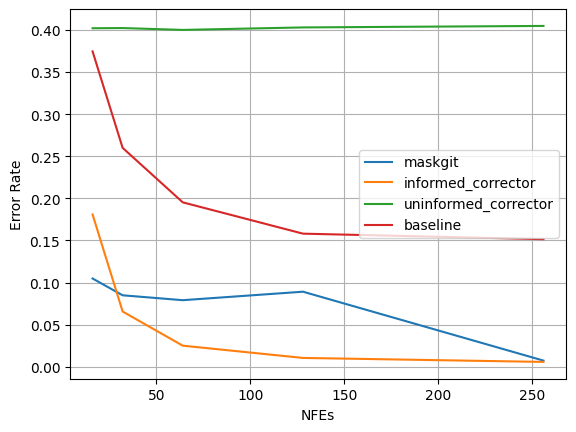

In [30]:
from matplotlib import pyplot as plt
import numpy as np

timestep_list = [16, 32, 64, 128, 256]
for key, value in meta_results_dict.items():
    plt.plot(
        timestep_list,
        1 - np.array([value[timestep] for timestep in timestep_list]),
        label=key,
    )
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("NFEs")
plt.grid()

In [20]:
with open(
    "/root/md4/data_dir/text8/informed_corrector_generations_32_acc.pkl", "rb"
) as f:
    results_dict = pickle.load(f)

In [21]:
results_dict

{(1, 0.1): 0.904065390406539,
 (1, 1.0): 0.8800309597523219,
 (1, 2.0): 0.8369433897134967,
 (1, 10.0): 0.772189863513866,
 (1, 1000.0): 0.7615160856162897,
 (2, 0.1): 0.9350966690958975,
 (2, 1.0): 0.9271560025679435,
 (2, 2.0): 0.8891309920533197,
 (2, 10.0): 0.798390237569778,
 (2, 1000.0): 0.7821040322231365,
 (4, 0.1): 0.9580700506339708,
 (4, 1.0): 0.7615160856162897,
 (4, 2.0): 0.9347062853228293,
 (4, 10.0): 0.813671587514611,
 (4, 1000.0): 0.7821040322231365,
 (8, 0.1): 0.9566152597402597,
 (8, 1.0): 0.9532112023583912,
 (8, 2.0): 0.9461368277739959,
 (8, 10.0): 0.8407232027550581,
 (8, 1000.0): 0.8010197411426331,
 (16, 0.1): 0.9349056230461794,
 (16, 1.0): 0.933620159803319,
 (16, 2.0): 0.9360852197070573,
 (16, 10.0): 0.8419837537409149,
 (16, 1000.0): 0.7876209398756047}

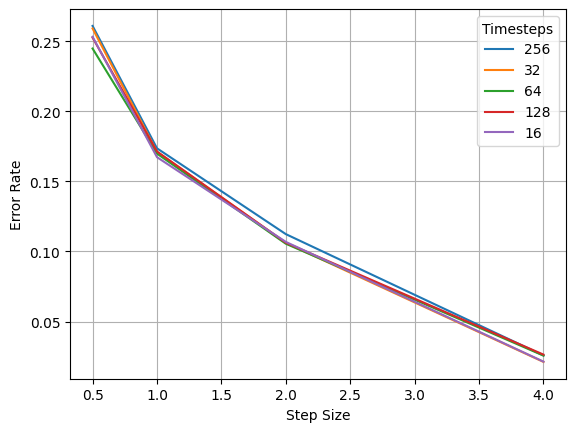

In [26]:
with open(
    "/root/md4/data_dir/text8/uninformed_corrector_generations_acc.pkl", "rb"
) as f:
    results_dict = pickle.load(f)

x_list = []
y_list = []
value_list = []
for key, value in results_dict.items():
    x_list.append(key[0])
    y_list.append(key[1])
    value_list.append(value)

# plot those with the sample x values and plot curves with different y values
x_list = np.array(x_list)
y_list = np.array(y_list)
value_list = np.array(value_list)

for x in set(x_list):
    plt.plot(y_list[x_list == x], 1 - value_list[x_list == x], label=f"{x}")
plt.legend(title="Timesteps")
plt.xlabel("Step Size")
plt.ylabel("Error Rate")
plt.grid()
plt.show()

In [31]:
with open("/root/md4/data_dir/text8/uninformed_corrector_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

In [35]:
results_dict.keys()

dict_keys([(16, 0.5), (32, 0.5), (64, 0.5), (128, 0.5), (256, 0.5), (16, 1.0), (32, 1.0), (64, 1.0), (128, 1.0), (256, 1.0), (16, 2.0), (32, 2.0), (64, 2.0), (128, 2.0), (256, 2.0), (16, 4.0), (32, 4.0), (64, 4.0), (128, 4.0), (256, 4.0)])

In [32]:
texts = results_dict[16, 0.5]

In [33]:
concated = " ".join(texts)
generated_words = concated.split()
s = 0
for word in generated_words:
    if word in vocab:
        s += len(word) + 1
s / len(concated)

0.5581952075876063

In [16]:
"te" in vocab

True

In [34]:
concated

'e  ujbai uds bd te en hee zah srah saalyam fearna katrina ichaj cam ha m ez   eola venis  i a hinny canh bei breef i  h daice giwi he thee hawa h a teak h naa a h s nga raon horu r inut kai or i en ko ska a asika s er i le en erya n srinda ch i n ger hun n   a seleprinter  arem zwanzal onych b byle nmijczeszow  szes cz poma shamnoca  ievocegar s a baznar  hanes k kranigm rd sz n ndki tefj ndo p  taakortat tuysiak mc zarnigzad yc regyh z cz sdw rda abe wa  lae im ci ce ca ja skompazary szawke zaradnj uk kongo a saamin s amer sonsredanoth bekanertis s rti a  er  e va na sigra do bria va pas bru malakta a kalaka ne kainits  vadversa minti a pandika husskai ana ny ulena prinsert pocneistein kaatan malakaka musna mashuja maetuka hsn dabyk nisv r marvanch u naytava  arkunnan vaz roan roan stania brontill uma tm crosnia ru rt a c  ije taang  i jlac ono  imiop antsura a usa ude tanwest udaui auaash i anon anta arittenau  niwamecenyaoi malovecuna herewolmarantonia kin wastva tsia ts na a ri i 

In [12]:
generated_words

['our',
 'e',
 'co',
 'te',
 'e',
 's',
 'ae',
 'ee',
 'ly',
 'ae',
 'he',
 'ee',
 'ly',
 'ae',
 'iee',
 'tee',
 'e',
 'on',
 'e',
 'an',
 'e',
 'an',
 'and',
 'te',
 'e',
 'in',
 'iee',
 'tee',
 'e',
 'the',
 'e',
 'ment',
 'r',
 'men',
 'iee',
 'of',
 'the',
 'he',
 'e',
 'on',
 'our',
 'e',
 'in',
 'e',
 't',
 'our',
 'e',
 'ere',
 'iee',
 'tee',
 'our',
 'he',
 'e',
 'the',
 'he',
 'e',
 'in',
 'e',
 'ing',
 't',
 'ee',
 'an',
 'ingh',
 'e',
 'in',
 'e',
 'ine',
 'tee',
 'ing',
 't',
 'e',
 'ine',
 'tee',
 'he',
 'e',
 'wo',
 'e',
 'he',
 'e',
 'an',
 'e',
 'iee',
 'tee',
 'e',
 'external',
 'i',
 's',
 'e',
 'in',
 'e',
 'e',
 'on',
 'e',
 'our',
 'e',
 's',
 'ee',
 'and',
 'to',
 'e',
 'an',
 'e',
 'an',
 'an',
 'iee',
 'tee',
 'e',
 'on',
 'e',
 's',
 'ae',
 'and',
 'te',
 'o',
 'k',
 'e',
 'in',
 'e',
 'e',
 'be',
 'ine',
 'tee',
 'and',
 'te',
 'iee',
 'tee',
 'ine',
 'tee',
 'e',
 's',
 'ae',
 'ing',
 't',
 'e',
 'an',
 'he',
 'e',
 's',
 'ae',
 'iee',
 'tee',
 'e',
 'an',
 '